In [1]:
import numpy as np
import matplotlib.pyplot as plt

'Common Variables'
pi = np.pi
sin = np.sin
sqrt = np.sqrt

# Problem 1

#### Plots of the Lissajous figures below for different values of w.

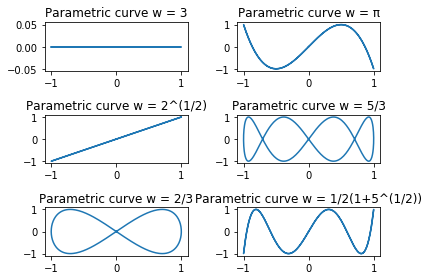

In [2]:
######################################## PROBLEM 1 ##########################################

figure, axes = plt.subplots(3, 2)

def parametric_plot(w):
    global x; global y
    t = np.linspace(-pi, pi, 300)
    x = sin(t)
    y = sin(w*t)
    return x, y

'Setting my values for w'
w_values = [3, 2**(1/2), 2/3, pi, 5/3, (1/2)*(1+(5**(1/2)))]
w_titles = ['w = 3', 'w = 2^(1/2)', 'w = 2/3', 'w = \u03C0', 'w = 5/3', 'w = 1/2(1+5^(1/2))']

'Plotting my graphs for w values'
i, j = 0, 0
for w in range(0, len(w_values)):
    parametric_plot(w)
    axes[i, j].plot(x, y)
    axes[i, j].set_title('Parametric curve ' + str(w_titles[w]))
    if i == 2:
        i, j = 0, 1
    else: 
        i += 1
    
figure.tight_layout()
plt.show()

# Problem 2

In [3]:
######################################## PROBLEM 2 ##########################################

# Distance to Perihelion (km) or 200 km altitude (FIXED)
perihelion = 6600000 # meters
r_earth = 6400
m_earth = 5.98*(10**24)
G = 6.673*(10**(-11))

## Part a.)

#### The result is it will take 239 orbits to circularize. (As calculated below, using normalized angular speeds and formulas)

In [4]:
################## PART a.) ##################
# Initial Eccentricity of the initial orbit
ecc_0 = .9656
# Eccentricity limit (When we consider orbit circular)
ecc_limit = 1/7
# Impulsive drag force to reduce velocity of satellite
delta = .01


# Actual Inital results
alpha = perihelion*(1 + ecc_0)
actual_aphelion_0 = alpha/(1 - ecc_0)
semi_major_axis_0 = (perihelion + actual_aphelion_0)/2
orbital_period = (2*pi*(semi_major_axis_0)**(3/2))/sqrt(G*(m_earth)) # seconds
#print(orbital_period)


# normalized initial velocities
perihelion_0 = 1 - ecc_0
aphelion_0 = 1 + ecc_0
ang_vel_perhelion_0 = 1/(1 - ecc_0**2) # since r_dot = 0 at perihelion
ang_vel_aphelion_0 = 1/(1 + ecc_0**2)


num_orbits = 1 # Start after the first orbit (when eccentricity changes)
e = ecc_0
ang_vel =  ang_vel_perhelion_0


# Using normalized angular speeds and formulas from Table 3.1, pg. 97 in Goldstien's
n = []
ratio_perihelion_aphelion = []
while e > (1/7):
    ang_vel = ang_vel - ang_vel*delta
    e = 1 - sqrt(1/ang_vel)

    aphelion = 1 + e
    semi_major_axis = (perihelion_0 + aphelion)/2
    semi_minor_axis = sqrt(semi_major_axis**2*(1 - e**2))
    
    num_orbits = num_orbits + 1

    # Assigning arrays for part c.)
    n.append(num_orbits)
    ratio_perihelion_aphelion.append(semi_minor_axis/semi_major_axis)
    
    # Calculating orbital period for part b.)
    alpha = perihelion*(1 + e)
    actual_aphelion_0 = alpha/(1 - e)
    actual_semi_major_axis = (perihelion + actual_aphelion_0)/2
    orbital_period = orbital_period + (2*pi*(actual_semi_major_axis)**(3/2))/sqrt(G*(m_earth))
    
    
print('It will take ' + str(num_orbits) + ' orbits for the orbit to circularize.')

It will take 239 orbits for the orbit to circularize.


## Part b.) 

#### The total amount of time it will take for the orbit to circularize: 61 days. (As calculated is part a)

In [5]:
################## PART b.) ##################

convert_period_to_days = orbital_period/(60*60*24)
print('The total amount of time it will take for the orbit to circularize: ' + str(convert_period_to_days) + ' days.')

The total amount of time it will take for the orbit to circularize: 60.96816118177484 days.


## Part c.)

#### Ratio of the semiminor to semimajor axis. (Arrays calculated in part a)

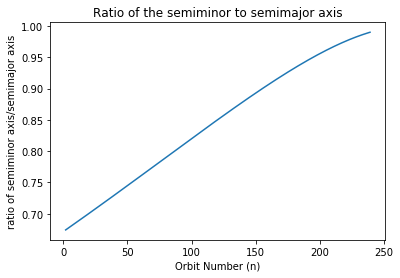

In [6]:
################## PART c.) ##################

plt.plot(n, ratio_perihelion_aphelion)
plt.xlabel('Orbit Number (n)')
plt.ylabel('ratio of semiminor axis/semimajor axis')
plt.title('Ratio of the semiminor to semimajor axis')
plt.show()

## Part d.) 

#### The initial normalized  angular velocity at the aphelion: 0.517 (rad/s). The final normalized angular velocity at the aphelion: 0.98 (rad/s). The reason the angular velocity keeps increasing is due to Kepler's Second Law.

In [7]:
################## PART d.) ##################

ang_vel_aphelion_f = 1/(1 + e**2)
print('The initial normalized velocity at the aphelion: ' + str(ang_vel_aphelion_0))
print('The final normalized velocity at the aphelion: ' + str(ang_vel_aphelion_f))

The initial normalized velocity at the aphelion: 0.5174956588324172
The final normalized velocity at the aphelion: 0.9807448624250505


# Problem 3

In [8]:
######################################## PROBLEM 3 ##########################################
from scipy.integrate import odeint
'Integrate over this equation of motion mR^2(d^2(theta)/dt^2) + mgRsin(theta) = 0'
'(d^2(theta)/dt^2) = -gsin(theta)/R'

'Constants'
R = 1.0  # Length of the pendulum in m
g = 9.807  # Acceleration due to gravity, in m/s^2

In [9]:
def pendulum_motion_sine(theta_init, t):
    theta_dot = theta_init[1]
    theta_double_dot =  -(g/R)*sin(theta_init[0])
    return theta_dot, theta_double_dot

def pendulum_motion_small_angle(theta_init, t):
    theta_dot = theta_init[1]
    theta_double_dot =  -(g/R)*(theta_init[0])
    return theta_dot, theta_double_dot


## Part a.)

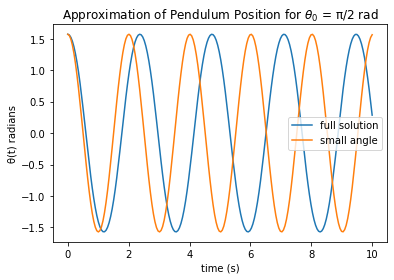

In [10]:
'Time points'
t_max = 10 # In seconds
t = np.linspace(0, t_max, 200)

################## PART a.) ##################
theta_1 = pi/2 # Initial Theta in rad
dtheta_dt = 0 # dtheta_dt is the initial angular velocities (radians per second) 

theta_init_1 = [theta_1, dtheta_dt]
sine_angle_approx = odeint(pendulum_motion_sine, theta_init_1, t)
small_angle_approx = odeint(pendulum_motion_small_angle, theta_init_1, t)

'plot results'
plt.plot(t, sine_angle_approx[:, 0], label = 'full solution')
plt.plot(t, small_angle_approx[:, 0], label = 'small angle')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('\u03B8(t) radians')
#plt.title('d\u00b2(\u03B8)/dt\u00b2 = -gsin(\u03B8)/R Approximation for \u03C0/2')
plt.title('Approximation of Pendulum Position for $\u03B8_0$ = \u03C0/2 rad')
plt.show()

## Part b.)

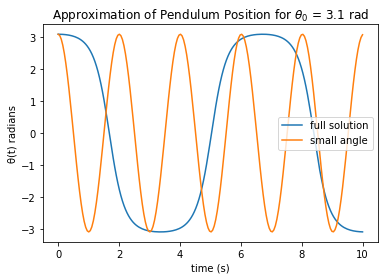

In [11]:
################## PART b.) ##################
theta_2 = 3.1 # Initial Theta in rad
dtheta_dt = 0 # dtheta_dt is the initial angular velocities (radians per second) 

theta_init_2 = [theta_2, dtheta_dt]
sine_angle_approx = odeint(pendulum_motion_sine, theta_init_2, t)
small_angle_approx = odeint(pendulum_motion_small_angle, theta_init_2, t)

'plot results'
plt.plot(t, sine_angle_approx[:, 0], label = 'full solution')
plt.plot(t, small_angle_approx[:, 0], label = 'small angle')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('\u03B8(t) radians')
plt.title('Approximation of Pendulum Position for $\u03B8_0$ = 3.1 rad')
plt.show()

## Part c.)

#### The amplitude where the angular frequency deviates by more than 2% is: 0.567 radians. (As calculated below)

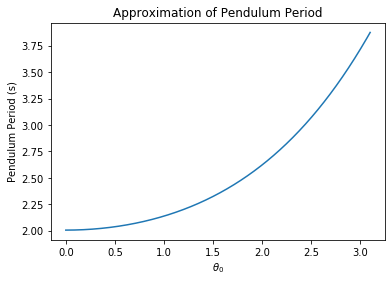

The amplitude where the angular frequency deviates by more than 2% is: 0.5678678678678679 radians.


In [12]:
################## PART c.) ##################

'Small angle pendulum period'
T = 2*pi*(np.sqrt(R/g))
'Small angle angular frequency: w = 2pi/T'
w_0 = (2*pi)/T

'Theta points'
theta_max = 3.1 # In radians
thetas = np.linspace(0, theta_max, 1000)

'Large angle pendulum period'
period = T*(1 + (1/16)*thetas**2 + (11/3072)*thetas**4)

plt.plot(thetas, period)
plt.ylabel('Pendulum Period (s)')
plt.xlabel('$\u03B8_0$')
plt.title('Approximation of Pendulum Period')
plt.show()

# Initial i at 0 rad
i = 0
# Initial Angular Frequency (Large Angle)
w = (2*pi)/period[i]

'Angular Frequency Comparison'
while  abs(w_0 - w) < w_0*.02:
     i += 1
     w = (2*pi)/period[i]
print('The amplitude where the angular frequency deviates by more than 2% is: ' + str(thetas[i]) + ' radians.')